# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [2]:
# If this cell does not work try running `pip install nbformat`

import io
import nbformat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re
import seaborn as sns

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 649


## Group Number : 52

## Student 1 
### Name : Cristina Stoleriu
### ID : 592530

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

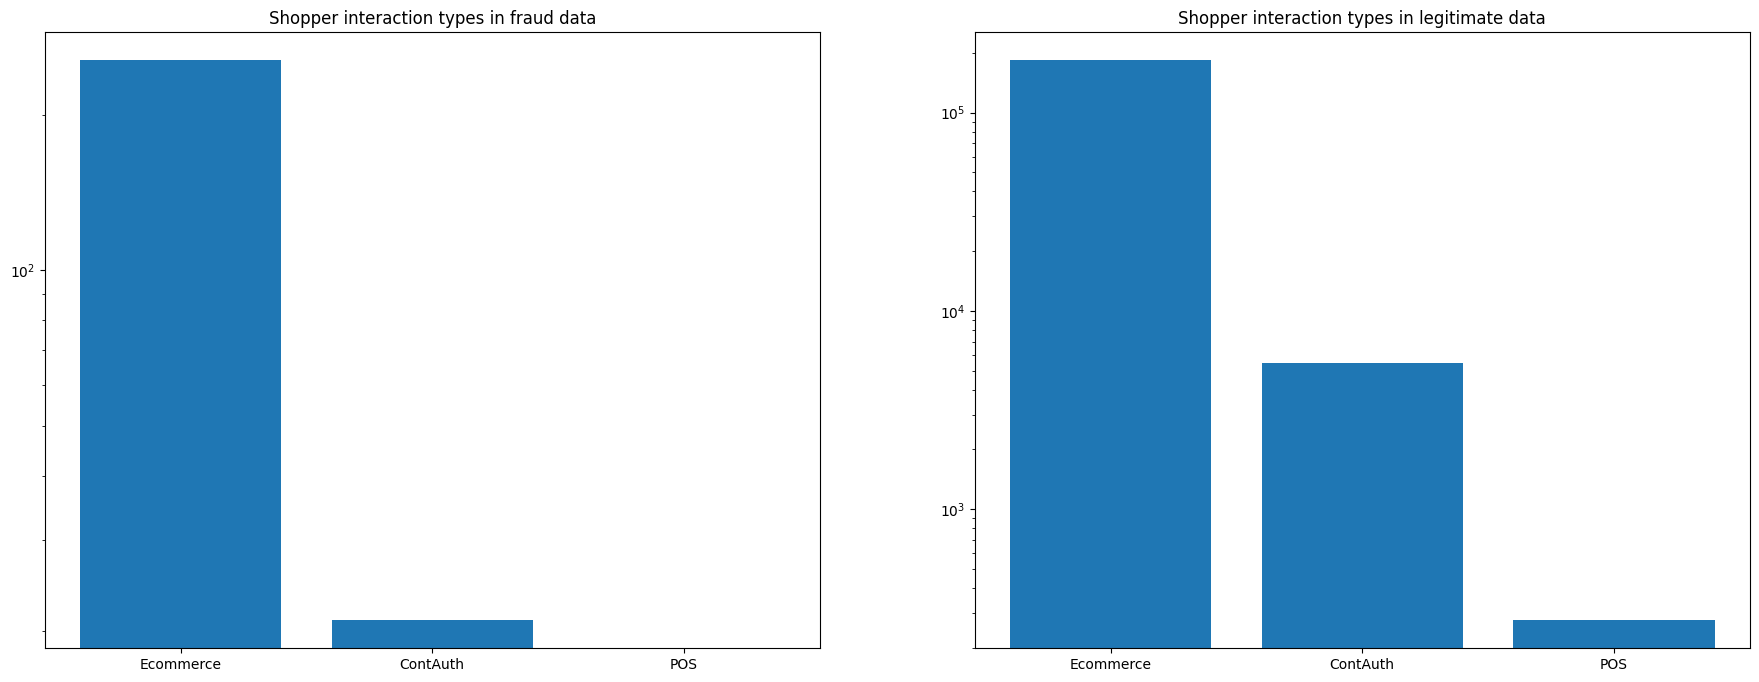

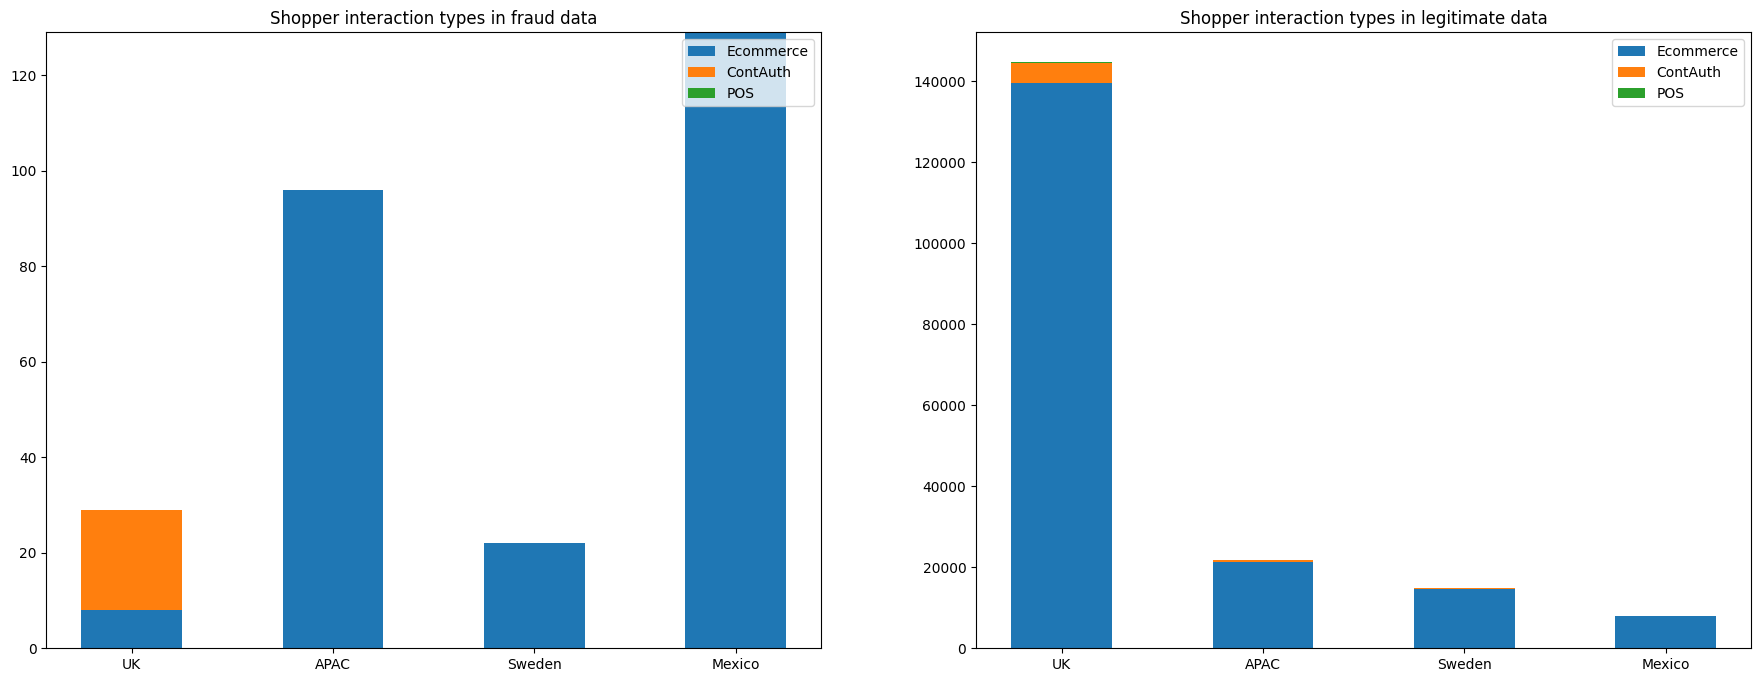

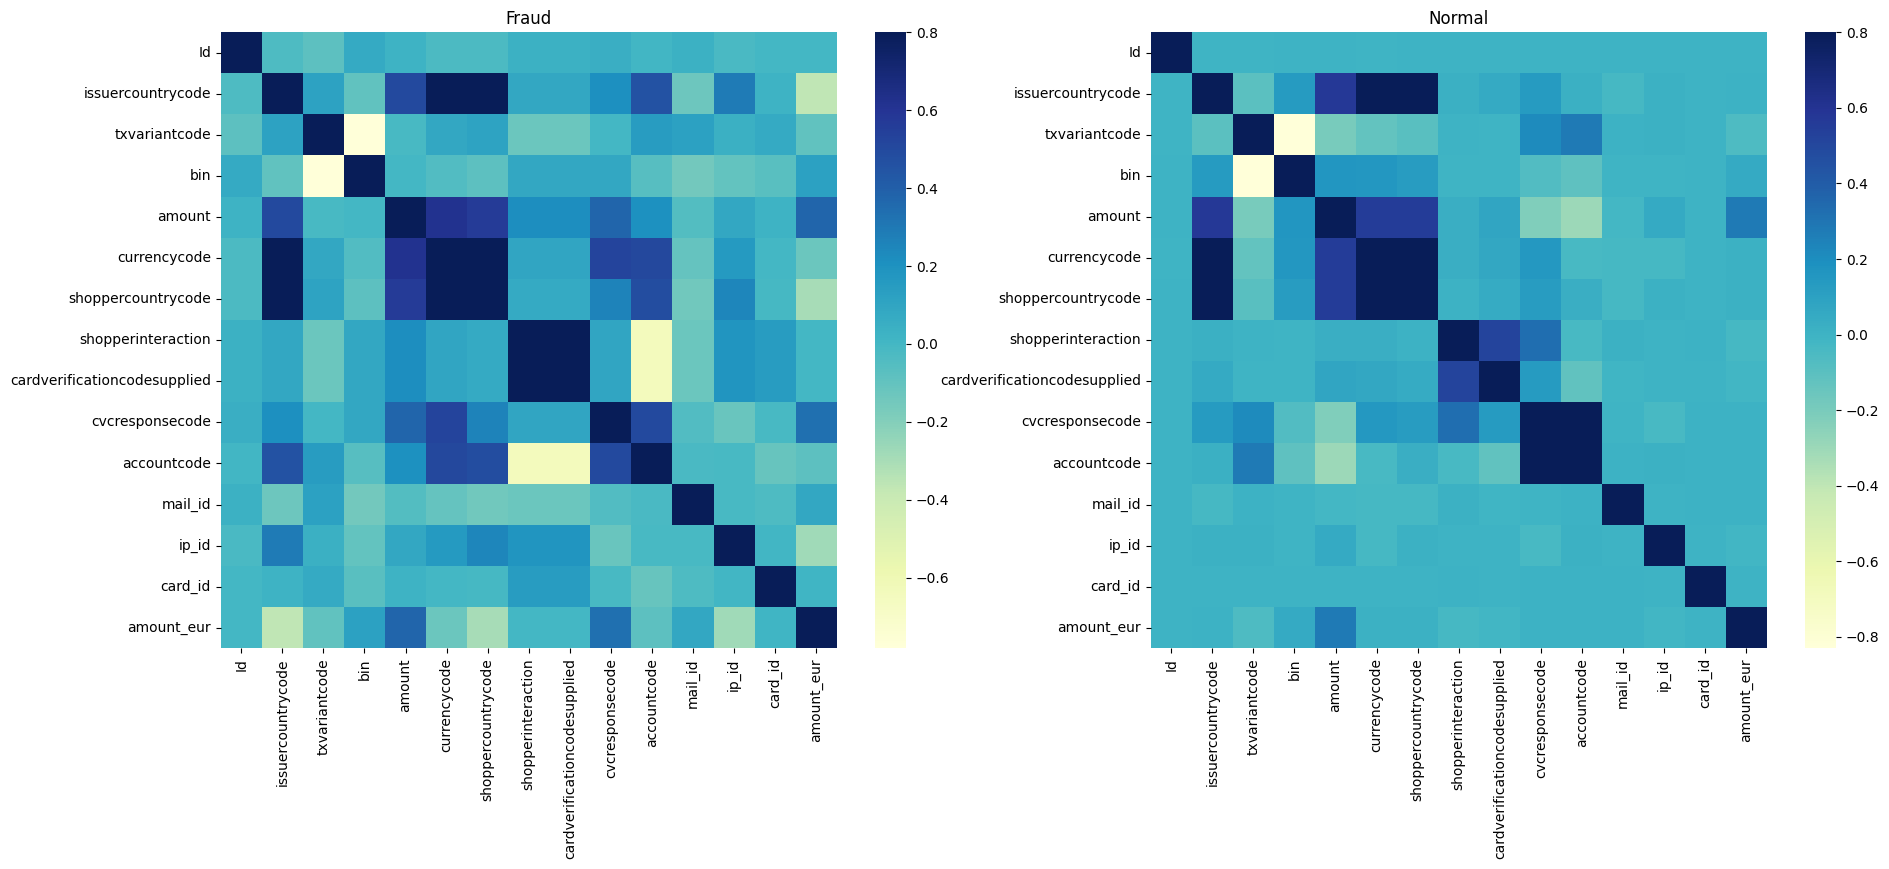

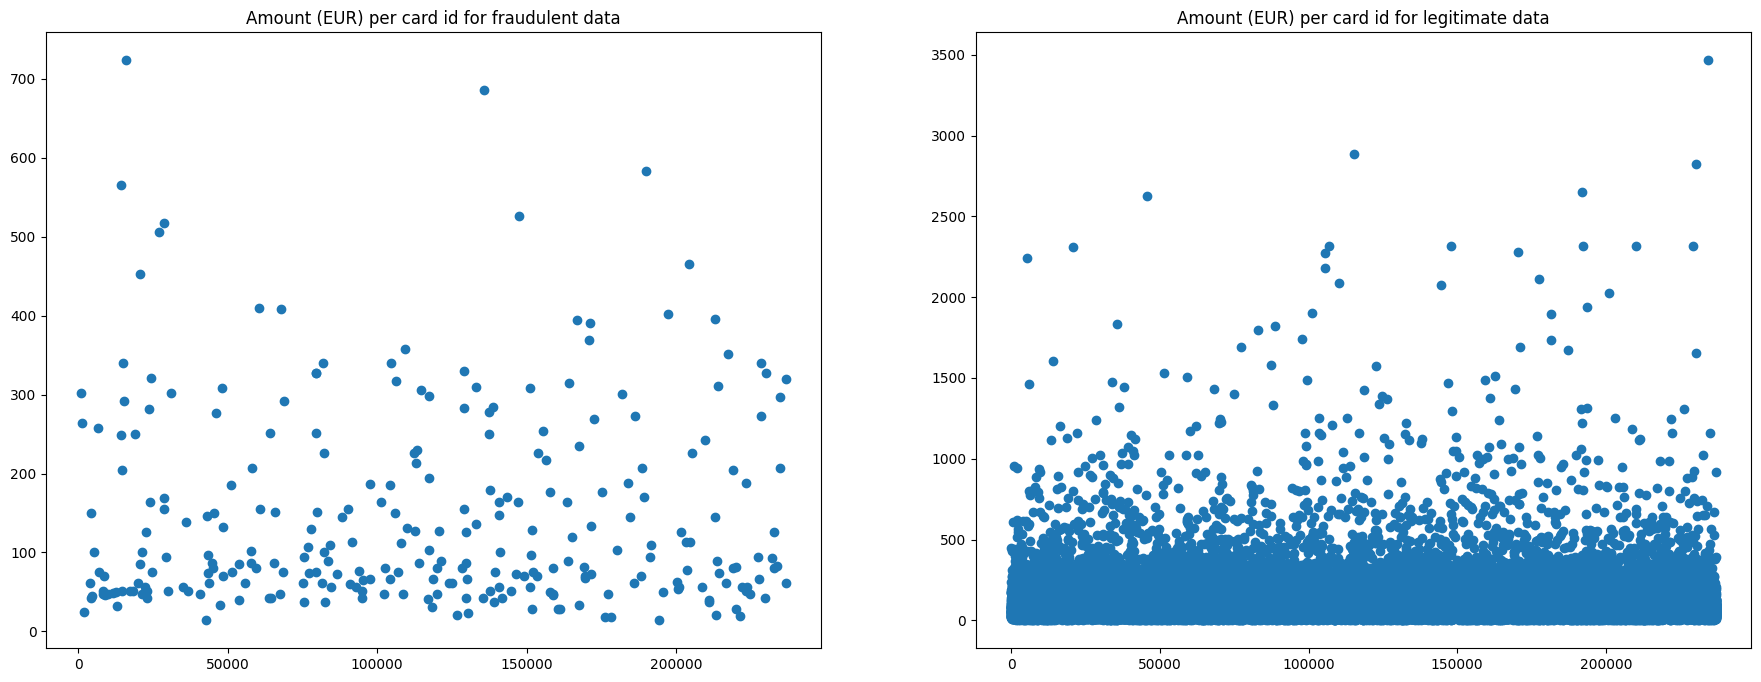

In [3]:
df = pd.read_csv("train_data.csv")
# encode for visualization
df['accountcode'] = df['accountcode'].apply(lambda x: re.sub('Account', '', x))

fraud = df[df['label'] == 1]
legit = df[df['label'] == 0]

### shopper interaction types per type of data
interaction_labels = ['Ecommerce', 'ContAuth', 'POS']

intr_fraud = {}
intr_legit = {}
for label in interaction_labels:
    intr_fraud[label] = len(fraud[fraud['shopperinteraction'] == label])
    intr_legit[label] = len(legit[legit['shopperinteraction'] == label])

f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))
p1 = ax1.bar(*zip(*intr_fraud.items()))
p2 = ax2.bar(*zip(*intr_legit.items()))

ax1.set_title("Shopper interaction types in fraud data")
ax1.set_yscale('log')
ax2.set_title("Shopper interaction types in legitimate data")
ax2.set_yscale('log')

### shopper interaction types per account code type of data
interaction_labels = ['Ecommerce', 'ContAuth', 'POS']
acc_labels = df['accountcode'].unique()

intr_fraud = {}
intr_legit = {}
for label in interaction_labels:
    intr_fraud[label] = []
    intr_legit[label] = []
    for code in acc_labels:
        intr_fraud[label].append(len(fraud[(fraud['shopperinteraction'] == label) & (fraud['accountcode'] == code)]))
        intr_legit[label].append(len(legit[(legit['shopperinteraction'] == label)  & (legit['accountcode'] == code)]))

f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))
below = np.zeros(len(acc_labels))
for label, nrs in intr_fraud.items():
    p1 = ax1.bar(acc_labels, nrs, 0.5, label=label, bottom=below)
    below += nrs

below = np.zeros(len(acc_labels))
for label, nrs in intr_legit.items():
    p2 = ax2.bar(acc_labels, nrs, 0.5, label=label, bottom=below)
    below += nrs

ax1.set_title("Shopper interaction types in fraud data")
ax1.legend(loc="upper right")

ax2.set_title("Shopper interaction types in legitimate data")
ax2.legend(loc="upper right")


### preprocessing for correlation heatmap
card_le = LabelEncoder()
card_le.fit(df['card_id'])
df['card_id'] = card_le.transform(df['card_id'])

ip_le = LabelEncoder()
ip_le.fit(df['ip_id'])
df['ip_id'] = ip_le.transform(df['ip_id'])

mail_le = LabelEncoder()
mail_le.fit(df['mail_id'])
df['mail_id'] = mail_le.transform(df['mail_id'])

acc_le = LabelEncoder()
acc_le.fit(df['accountcode'])
df['accountcode'] = acc_le.transform(df['accountcode'])

df.loc[df['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df['cardverificationcodesupplied'] = df['cardverificationcodesupplied'].astype(int)
cvcsup_le = LabelEncoder()
cvcsup_le.fit(df['cardverificationcodesupplied'])
df['cardverificationcodesupplied'] = cvcsup_le.transform(df['cardverificationcodesupplied'])

shopper_le = LabelEncoder()
shopper_le.fit(df['shopperinteraction'])
df['shopperinteraction'] = shopper_le.transform(df['shopperinteraction'])

ccs = np.append(df['issuercountrycode'].unique(), df['shoppercountrycode'].unique())
df_ccs = pd.DataFrame(ccs)
unique_codes = df_ccs[0].unique()
cc_le = LabelEncoder()
cc_le.fit(unique_codes)
df['issuercountrycode'] = cc_le.transform(df['issuercountrycode'])
df['shoppercountrycode'] = cc_le.transform(df['shoppercountrycode'])

txv_le = LabelEncoder()
txv_le.fit(df['txvariantcode'])
df['txvariantcode'] = txv_le.transform(df['txvariantcode'])

def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df['amount_eur'] = df.apply(lambda x: conv(x), axis=1)

curr_le = LabelEncoder()
curr_le.fit(df['currencycode'])
df['currencycode'] = curr_le.transform(df['currencycode'])

df.loc[df['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

### correlation matrices
f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))

sns.heatmap(df.query('label==1').drop(['label'], axis=1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')
sns.heatmap(df.query('label==0').drop(['label'], axis=1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

### amount per type of data
fraud = df[df['label'] == 1]
legit = df[df['label'] == 0]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,8))
p1 = ax1.scatter(fraud['Id'], fraud['amount_eur'])
p2 = ax2.scatter(legit['Id'], legit['amount_eur'])
ax1.set_title('Amount (EUR) per card id for fraudulent data')
ax2.set_title('Amount (EUR) per card id for legitimate data')
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

The first graph counts the number of transactions per shopper interaction type for fraudulent and legitimate data. We can see that fraduluent data heavily favors ecommerce transactions, which is to be expected; they are more anonymous than POS transactions, and require a one time payment, unlike ContAuth transactions.

The heatmaps represent the correlation between all features. We observe a stronly negative correlation in fraudulent data between the account code and shopper interaction not present in legitimate data, which may indicate that as we move further into the account code list, shopper interaction type is lower - here, this means that, for example, in the UK account codes we expect more ContAuth transaction types. Similarly, we note a strong positive correlation between account code and currency code in the fraudulent data. This would seem to indicate that in fraudulent data, more foreign currency (wrt. the accound code) is used.

| 0    | 1  | 2  | 3  |
|------|----|----|----|
| APAC | MX | SW | UK |

<br>

| 0   | 1   | 2   | 3   | 4   |
|-----|-----|-----|-----|-----|
| AUD | GBP | MXN | NZD | SEK |

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

Computing nearest neighbors...
SMOTEing...


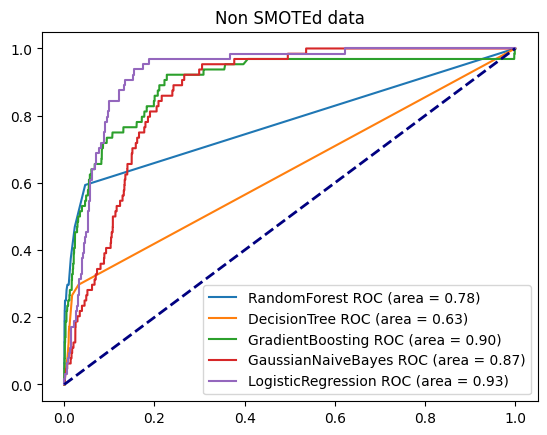

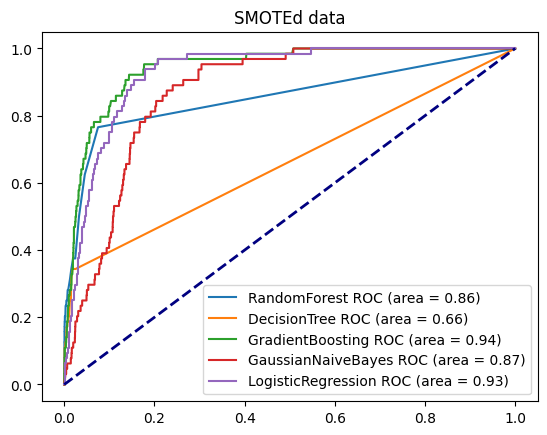

In [4]:
### Cristina Stoleriu

from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

cont_label = ['Id', 'amount', 'mail_id', 'ip_id', 'card_id']
cat_label = ['issuercountrycode', 'txvariantcode', 'bin', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 'cvcresponsecode', 'accountcode']
cont = [0, 4, 11, 12, 13]
cat = [1, 2, 3, 5, 6, 7, 8, 9, 10]

# median of stds of continuous features, for nearest neighbor search
med = np.median(df[cont_label].std().to_numpy())

# modified euclidian distance for picking nearest neighbors
# from https://arxiv.org/pdf/1106.1813
def NCmetric(x, y):
    d = 0
    for col in cont:
        d += (x[col]-y[col])**2
    for col in cat:
        if x[col] != y[col]:
            d += med*med
    return np.sqrt(d)


def conv(row):
    curr_mapping = dict(zip(curr_le.transform(curr_le.classes_), curr_le.classes_))
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                    "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                    "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                    "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                    "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                    "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[curr_mapping[row['currencycode']]]*100)


def SMOTENC(data, N, nn): 
    r, c = data.shape
    if N < 1.0:
        r = round(N*r)
        N = 1.0
    gen_data = np.zeros([r*N, c])
    idx = 0
    # neigh => horse
    # choose neighbors according to modified euclidian distance
    print("Computing nearest neighbors...")
    horse = NearestNeighbors(n_neighbors=nn+1, metric=NCmetric).fit(data.to_numpy())
    print("SMOTEing...")
    # do for every data point
    for i in range(r):
        horse_array = horse.kneighbors(data.iloc[i].to_numpy().reshape(1, -1), return_distance=False)[0]
        modes = data.iloc[horse_array, cat].mode().to_numpy().ravel()
        # for N nearest neighbors
        for j in range(N, 0, -1):
            horse_idx = randrange(1, nn+1)
            for attr in range(c):
                # for continuous attributes, use distance
                if attr in cont:
                    diff = data.iloc[horse_array[horse_idx], attr] - data.iloc[i, attr]
                    add = uniform(0,1)
                    gen_data[idx][attr] = data.iloc[i, attr] + diff*add
                # for categorical data, use mode of nearest neighbors
                elif attr in cat:
                    mode_idx = attr-1
                    if attr >= 5:
                        mode_idx -= 1
                    gen_data[idx][attr] = modes[mode_idx]
            idx += 1
    # some data type funkyness
    gen_df = pd.DataFrame(gen_data, columns=list(data))
    col_to_int = cat_label + ['Id', 'mail_id', 'ip_id', 'card_id']
    gen_df[col_to_int] = gen_df[col_to_int].astype(int)
    gen_df['amount'] = np.trunc(gen_df['amount'])
    gen_df['bin'] = gen_df['bin'].astype(float)
    # transform properly to amount euro
    gen_df['amount_eur'] = gen_df.apply(lambda x: conv(x), axis=1)
    return gen_df


x = df.drop(['label'], axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

fraud_train = x_train[y_train == 1]
new_data = SMOTENC(fraud_train, N=4, nn=5)

### ROC curves
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
gbc = GradientBoostingClassifier(loss="log_loss", criterion='friedman_mse', n_estimators=10, subsample=1.0, max_depth=8, max_features='log2', random_state=42)
gnb = GaussianNB()
lr = LogisticRegression(solver='newton-cholesky', random_state=42)

models = [rf, dt, gbc, gnb, lr]
model_names = ['RandomForest', 'DecisionTree', 'GradientBoosting', 'GaussianNaiveBayes', 'LogisticRegression']

# non smoted data
for m in range(len(models)):
    model = models[m]
    model.fit(x_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_names[m], score))
plt.plot([0,1], [0,1], color='navy', lw = 2, linestyle='--')
plt.title("Non SMOTEd data")
plt.legend(loc='best')
plt.show()

# smoted data
x_train_smote = pd.concat([x_train, new_data], ignore_index=True)
smote_label = pd.DataFrame(np.ones(new_data.shape[0]).astype(int))
y_train_smote = pd.concat([y_train, smote_label], ignore_index=True)
y_train_smote = y_train_smote.to_numpy().ravel()
for m in range(len(models)):
    model = models[m]
    model.fit(x_train_smote, y_train_smote)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_names[m], score))
plt.plot([0,1], [0,1], color='navy', lw = 2, linestyle='--')
plt.title("SMOTEd data")
plt.legend(loc='best')
plt.show()

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

On the original dataset, Naive Bayes achieves the best performance; however, it was not affected by the new synthetic data. Random Forest and GBM received the largest increases in accuracy after applying SMOTE.

### 2c. Is using SMOTE a good idea? Why (not)?

Oversampling using SMOTE is useful for this dataset, as the minority group is under represented. The continuous features cluster together and do not display nonlinear distribution, which would hinder synthetic data creation. We observe that the AUC of (most of) the classifiers increase after oversampling.

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# black box
#gbc = GradientBoostingClassifier(loss="log_loss", criterion='friedman_mse', n_estimators=10, subsample=1.0, max_depth=8, max_features='log2', random_state=42)
# print("Training black box model...")
# rf = RandomForestClassifier(random_state=42)
# scores = cross_val_score(rf, x_train_smote, y_train_smote, cv=10, scoring='f1_macro')
# print("RandomForest %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# # white box ?
# print("Training white box model...")
# dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)
# scores = cross_val_score(dt, x_train_smote, y_train_smote, cv=10, scoring='f1_macro')
# print("DecisionTree %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

def grid_search(X,y,nfolds):
    param_grid = {'bootstrap': [True, False],
        'max_depth': [10, 50, 100],
        'max_features': ['sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 1000, 2000]}
    model=RandomForestClassifier(random_state=42)
    gscv = GridSearchCV(model, param_grid, cv=nfolds)
    gscv.fit(X, y)
    return gscv.best_params_

print(grid_search(x_train_smote, y_train_smote, 5))

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below